### torch.no_grad() vs. param.requires_grad

- torch.no_grad()
    - 定义了一个上下文管理器，隐式地不进行梯度更新，不会改变 requires_grad
    - 适用于 eval 阶段，或 model forward 的过程中某些模块不更新梯度的模块（此时这些模块仅进行特征提取（前向计算），不反向更新）
- param.requires_grad 
    - 显式地 frozen 掉一些module（layer）的梯度更新
    - layer/module 级别，
    - 可能会更灵活

    
    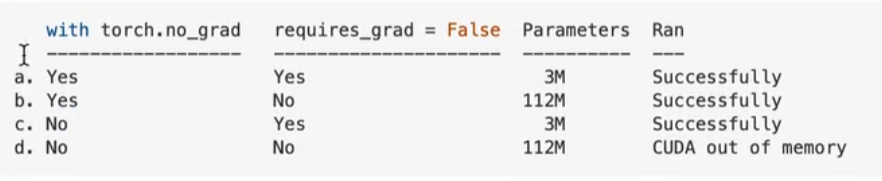

In [1]:
from transformers import BertModel
import torch
from torch import nn

In [2]:
model_name = 'bert-base-uncased'

In [3]:
bert = BertModel.from_pretrained(model_name)

In [4]:
def calc_learnable_params(model):
    total_param = 0
    for name, param in model.named_parameters():
        if param.requires_grad:
            total_param += param.numel()
    return total_param

In [5]:
calc_learnable_params(bert)

109482240

In [6]:
with torch.no_grad():
    print(calc_learnable_params(bert))

109482240


In [7]:
for name, param in bert.named_parameters():
    if param.requires_grad:
        param.requires_grad = False

In [21]:
calc_learnable_params(bert)

0